# Práctica 1 de Análisis Numérico

Melisa Gomez Díaz || Sheyla Mondragón Pérez


## Parte de Aritmética de Punto Flotante

In [ ]:
"Terminada"

## Parte de Álgebra Lineal Numérica

### Ejercicio 4
 **(3 puntos)**
<br>
<font color=blue>Considera la imagen en escala de grises *Lenna.png*. </font>

<img src="Lenna.png">

- <font color=blue> 
   Busque comandos para generar la matriz $A$ asociada a esta imagen tal que los elementos
  esten en formato doble del IEEE y en el intervalo $[0,1]$. Muestre la submatriz
   $$X = \begin{bmatrix} 
   a_{240,240} & \cdots & a_{240,289} \\
   \vdots & & \vdots \\
   a_{289,240} & & a_{289,289}
   \end{bmatrix}$$
   así como la imagen correspondiente a esta submatriz.

In [1]:
#Creación de matrices
using Images
A=convert(Array{Float64,2},load("Lenna.png"))
X=view(A,240:289,240:289)
println(" ")

INFO: Precompiling module ImageMagick.


In [ ]:
#Desplegar imagen
load("Lenna.png")

In [ ]:
#Desplegar matriz de la imagen
A

In [ ]:
#Desplegar submatriz X#
X

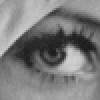

In [2]:
#Desplegar imagen de submatriz
convert(Array{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}},2},X)

- <font color=blue> Busque un comando para calcular el rango de una matriz y uselo para hallar
  el rango de $A$ y $X$.
 </font>

In [ ]:
println("Se usa el comando rank")
rangoA=rank(A)
rangoX=rank(X)
println("El rango de A es $rangoA y elrango de X es $rangoX")


>  <font color=blue>
  ¿$A$ es invertible?
  <br>
  ¿$X$ es invertible?
   </font>  

X es invertible y A no es invertible

- <font color=blue>
  Apile las columnas $X_1,\dots,X_{50}$ de $X$ en un vector

  $x= \begin{bmatrix} X_1 \\ \vdots \\ X_{50}\end{bmatrix}$
  </font>

In [3]:
aux1=vcat(X[1:50,1],X[1:50,2],X[1:50,3],X[1:50,4],X[1:50,5],X[1:50,6],X[1:50,7],X[1:50,8],X[1:50,9],X[1:50,10])
aux2=vcat(aux1,X[1:50,11],X[1:50,12],X[1:50,13],X[1:50,14],X[1:50,15],X[1:50,16],X[1:50,17],X[1:50,18],X[1:50,19],X[1:50,20])
aux3=vcat(aux2,X[1:50,21],X[1:50,22],X[1:50,23],X[1:50,24],X[1:50,25],X[1:50,26],X[1:50,27],X[1:50,28],X[1:50,29],X[1:50,30])
aux4=vcat(aux3,X[1:50,31],X[1:50,32],X[1:50,33],X[1:50,34],X[1:50,35],X[1:50,36],X[1:50,37],X[1:50,38],X[1:50,39],X[1:50,40])
aux5=vcat(aux4,X[1:50,41],X[1:50,42],X[1:50,43],X[1:50,44],X[1:50,45],X[1:50,46],X[1:50,47],X[1:50,48],X[1:50,49],X[1:50,50])
x=aux5

2500-element Array{Float64,1}:
 0.690196
 0.67451 
 0.6     
 0.603922
 0.627451
 0.631373
 0.631373
 0.686275
 0.694118
 0.709804
 0.713725
 0.74902 
 0.764706
 ⋮       
 0.447059
 0.45098 
 0.454902
 0.470588
 0.470588
 0.466667
 0.47451 
 0.466667
 0.478431
 0.490196
 0.498039
 0.490196

-  <font color=blue> Escriba un programa que genere la matriz de Toeplitz $T$ de tamaño $m\times m$ dada por 
 $$t_{i,j}=\dfrac{1}{\sqrt{2\pi}\sigma}a^{(i-j)^2},$$ donde
 $$a=\exp\left(\dfrac{-1}{2\sigma^2}\right)$$
 </font> 
  <font color=blue> **Entrada**: variables $\sigma>0,m\in\mathbb N$</font>
  <br>
  <font color=blue>**Salida**: arreglo $T$ de $m\times m$ 
    que almacena matriz de Toeplitz</font>
  <br>
  <font color=blue> Evite realizar ciclos (for,while)</font>



In [4]:
using MatrixDepot
cuad=function (x)
    rcuad=x^2
    return(rcuad)
end

rest=function (x)
    rrest=1-x
    return(rrest)
end

elev=function(b,e)
    b^e
end
    
funprin=function(sigma,m)
            a=exp((-1)/(2*(sigma^2)))
            q=(sqrt(2*π*(sigma^2)))
            s1=collect(1:m)
            s2=rest.(s1)
            s3=cuad.(s2)
            s4=elev.(a,s3)
            s4=s4/q
            r=matrixdepot("toeplitz",s4,s4)
            return(r)
        end
    
    

(::#7) (generic function with 1 method)

- <font color=blue>Fije $m=2500$, </font> 
  <br>
  <font color=blue> Para $\sigma=0.5,1,1.5,1.8,2.0,2.5,3.0,3.5$ </font> 
  
  > <font color=blue>  haga el producto $y =Tx$ usando el programa anterior </font> 
     <br>
    <font color=blue> Reacomode $y$ como una matriz $Y$ de tamaño $50\times 50$
    $$Y = \begin{bmatrix}
     y_1 & y_{51} & \dots & y_{2491}\\ \vdots & \vdots & \vdots \\ 
     y_{50} & y_{100} & \dots & y_ {2500}\\
    \end{bmatrix}$$ </font> 
    <br>
    <font color=blue> Muestre la imagen correspondiente</font> 

In [5]:
aux=(0.5,1,1.5,1.8,2.0,3.0,3.5)
multi=funprin(0.5,2500)
for i=2:7
    t2=funprin(aux[i],2500)
    multi=cat(3,multi,t2)
end




multi2=convert(Array{Any,3},ones(2500,1,7))
for i in 1:7
    multi2[:,:,i]=(multi[:,:,i])*x
end





i1=multi2[1:50,1,1]
for i in 51:50:2451
    i1=cat(2,i1,multi2[i:i+49,1,1])
end

i2=multi2[1:50,1,2]
for i in 51:50:2451
    i2=cat(2,i2,multi2[i:i+49,1,2])
end

i3=multi2[1:50,1,3]
for i in 51:50:2451
    i3=cat(2,i3,multi2[i:i+49,1,3])
end

i4=multi2[1:50,1,4]
for i in 51:50:2451
    i4=cat(2,i4,multi2[i:i+49,1,4])
end

i5=multi2[1:50,1,5]
for i in 51:50:2451
    i5=cat(2,i5,multi2[i:i+49,1,5])
end

i6=multi2[1:50,1,6]
for i in 51:50:2451
    i6=cat(2,i6,multi2[i:i+49,1,6])
end

i7=multi2[1:50,1,7]
for i in 51:50:2451
    i7=cat(2,i7,multi2[i:i+49,1,7])
end




i1=convert(Array{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}},2},i1)
i2=convert(Array{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}},2},i2)
i3=convert(Array{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}},2},i3)
i4=convert(Array{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}},2},i4)
i5=convert(Array{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}},2},i5)
i6=convert(Array{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}},2},i6)
i7=convert(Array{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}},2},i7)



println(" ")

In [ ]:
i1

In [ ]:
i2

In [ ]:
i3

In [ ]:
i4

In [ ]:
i5

In [ ]:
i6

In [ ]:
i7

> <font color=blue>
    ¿cómo cambian las imágenes que obtiene en relación a la desviación estándar $\sigma$?
  </font>

Pierden calidad en medida que aumenta la desviación estandar

- <font color=blue> 
 Fije $m=2500$, genera una tabla con $\text{cond}_1(T)$ para 
 $\sigma=1,1.5,1.8,2.0,2.1,2.3,2.5$ 
 </font>

In [ ]:
aux=(0.5, 1, 1.5, 1.8, 2.0, 3.0, 3.5)
println("T         sigma         número de condición")
for i in 1:7
    co=cond(multi[:,:,i])
    sig=aux[i]
    println("T$i         $sig        $co")
end    
#esta linea tarda mucho en correr pero sí corre  :) 

> <font color=blue> 
¿qué puede decir del condicionamiento de $T$ en relación a la desviación estándar $\sigma$?
</font>

Aumentan con sigma

- <font color=blue>  En teoría, la matriz $T$ es positiva definida para cualquier valor de $\sigma>0$.  Por lo que tiene factorización de Cholesky. 
  <br>
  Sin embargo esto no es válido con el formato doble del IEEE.
  <br>
  Fije $m=50$. 
  <br>
  **Halle al tanteo el valor más grande de $\sigma>0$** hasta con dos decimales (Ej. 3.56, 17.29)
  para el cúal pueda calcular la factorización de Cholesky de $T$
 </font>

> <font color=blue> use una rutina para la  factorización de Cholesky  </font> 
  <br>
  <font color=blue> No es necesario mostrar las factorizaciones de Cholesky, pero sí
       el mensaje de error de la rutina </font>   

In [42]:
x=true
p=0
n=0.00
while x
    n=n+(1/100)
chol(funprin(n,50))
end


maximo sigma= 1.0000000000000007


### Ejercicio 5
 **(1.5 puntos)**
<br>
<font color=blue>Halle un comando para generar la matriz de Hilbert $H_n$ de tamaño $n\times n$.
</font>

-  <font color=blue>
    Construya una tabla que muestre  $\text{cond}_{\infty}(H_n)$ y $\det(H_n)$ para $n=1,\dots,30$
    </font>

In [43]:
println("      condición    determinante")
for i in 1:30
    A=matrixdepot("hilb",i)
    c=cond(A,Inf)
    d=det(A)
    println("n=$i  $c   $d   ")
end

      condición    determinante
n=1  1.0   1.0   
n=2  27.00000000000001   0.08333333333333331   
n=3  748.0000000000026   0.00046296296296296135   
n=4  28375.00000000183   1.653439153439039e-7   
n=5  943656.0000063627   3.7492951324898145e-12   
n=6  2.907027900379063e7   5.3672998866563796e-18   
n=7  9.851948895777661e8   4.835802608827547e-25   
n=8  3.387279238592448e10   2.737050008673933e-33   
n=9  1.0996519947440176e12   9.72025647771838e-43   
n=10  3.535684761051709e13   2.1642146273020104e-53   
n=11  1.2345328167416198e15   3.0170658653599326e-65   
n=12  4.255399301891294e16   2.550554736789249e-78   
n=13  7.78165815188001e17   2.4518239825027092e-92   
n=14  1.1489640282002908e18   -2.387174085032749e-106   
n=15  9.750557203923405e17   -2.1491893717231122e-120   
n=16  1.0083374783297378e19   5.926327736317625e-136   
n=17  2.6446253134489083e18   7.571985326424623e-150   
n=18  2.2028869950861688e18   9.199350296480875e-165   
n=19  2.2998065559692987e18   1.1253884

> <font color=blue>¿cómo cambia el determinante conforme $n$ aumenta?</font>

In [45]:
"Disminuye"

"Disminuye"

- <font color=blue>
  Gŕafique  $\text{cond}_{\infty}(H_n)$ contra $n$  para $n=1,\dots,30$ usando escala logarítmica
  para el eje vertical</font>

In [12]:
using Interact, Plots, MatrixDepot

In [13]:

function condinfh(n)
    m=matrixdepot("hilb",n)
    s=cond(m,Inf)
    return(s)
end

f(x)=condinfh.(x)
plot(f,1:30,yscale = :log10)

> <font color=blue> ¿qué le dice la gráfica anterior sobre el condicionamiento de $H_n$? </font>

Aumenta su número de contición 

-   <font color=blue>
    Sea  $u$ un vector de unos de $n$ componentes. Sea $b=Hu$. 
    <br>
    Calcule la solución  $\widehat x$ del sistema $Hx=b$ mediante factorización 
    LU con pivoteo por renglones 
    <br>
    y $\|\widehat x-u\|_{\infty}$ para $n=5,\dots,20$.
    </font>
    
 >   **NOTAS**:
 <br>
 >  <font color=blue> puede usar una rutina para factorización LU con pivoteo ,</font> 
 <br>
 >  <font color=blue> no muestre explicítamente todas las
  factorizaciones y las soluciones, basta con la tabla de la normas $\|\widehat x-u\|_{\infty}$</font> 

In [16]:
n=3
u=ones(1:n)

Tuple{Int64,Int64}

> <br>
    <font color=blue> En teoría, $\widehat x=u$. Por lo que $\|\widehat x-u\|_{\infty}=0$. <br>
> <br>
    <font color=blue> ¿esto se refleja en los calculos que hizo? ¿qué ocurre?<br>

### Ejercicio 6
 **(2 puntos)**
<br>
<font color=blue>
 Una manera de calcular los valores de la función $u$ en el problema de valores en la frontera
    <br>
    $$\begin{array}{rl}
    -u''(x)+u(x) =1, & 0<x<1 \\ u(0)= 1, & \\ u(1) =0,  
    \end{array}$$
es mediante el método de diferencias finitas.
<br>
Sea $h=\dfrac{1}{m+1}$y sean $x_j=jh$ para $j=1,\dots,m$. 
<br>
Los valores aproximados de $u(x_j)$ son las componentes $\widehat z_j$ de la solución $\widehat z$ del 
sistema de ecuaciones lineales 
<br>
<br>
$$Tz=b,$$ donde
<br>
  $$ T =
  \begin{bmatrix}
  2+h^2 & -1 & & 0 \\ -1 & \ddots & \ddots & \\ & \ddots & \ddots & -1 \\ 0 & & -1 & 2+h^2
  \end{bmatrix}$$
es matriz tridiagonal simétrica $m\times m$ y 
$$b=
\begin{bmatrix}
 h^2 +1 \\ h^2 \\ \vdots \\ h^2
\end{bmatrix}_{m\times 1}
$$  
</font>

- <font color=blue> 
  Busque una rutina para hallar la Factorización LU de una matriz tridiagonal simétrica 
  <br>
  y usela para resolver $Tz=b$ cuando $h=0.1,0.05,0.025,0.0125$ </font>

>  <font color=blue> La rutina solo debe realizar operaciones con los elementos de la diagonal 
    principal, la subdiagonal y la superdiagonal tanto en la Factorización como en las fases de 
    sustitución directa y hacia átras</font>

- <font color=blue>  La función $$u(x)=1-\dfrac{\sinh(x)}{\sinh(1)}$$ es la solución del problema de valores en frontera. 
  <br>
  En una misma figura gráfique los valores $u(x_j)$ contra $x_j$ y las componentes 
  $\widehat z_j$ contra $x_j$ para $h=0.1$ 
  </font>

- <font color=blue> 
 Muestre una tabla con los errores
  $$\left\|
  \begin{bmatrix}
  u(x_1) \\ \vdots \\ u(x_m)
 \end{bmatrix} -
 \begin{bmatrix}
  z_1 \\ \vdots \\ z_m
 \end{bmatrix}
  \right\|_{\infty}$$
  para $h=0.1,0.05,0.025,0.0125$ </font>